In [1]:
import csv
import pickle
import datetime

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [3]:
data = pd.read_csv('data/data.csv')
data=data.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


([ 5,  6,  8,  9, 11, 12, 16, 23, 25, 27, 28, 30, 31, 32, 36, 37, 41,
           43, 44, 45, 53, 59, 65, 68, 79, 83],

In [4]:
item_list = [ 5,  6,  8,  9, 11, 12, 16, 23, 25, 27, 28, 30, 31, 32, 36, 37, 41, 43, 44, 45, 53, 59, 65, 68, 79, 83]

In [5]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,:-1], data.units
X_train, X_testm, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

In [6]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,['store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',\
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', \
    'sealevel', 'avgspeed', 'resultspeed', 'resultdir'])
    df['date'] = pd.to_datetime(df['date'])
    df["week_day_name"] = df['date'].dt.weekday_name
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()

In [7]:
def itemdf(df, nbr):
    item_nbr = df[df.item_nbr == nbr]
    for idx in range(5, 8):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    
    for idx in range(16, 23):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    add_depart1(item_nbr)
    
    return item_nbr
    

In [8]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

#예시

# data = type_change_numeric(data,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
#        'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
#        'avgspeed', 'resultspeed', 'resultdir' ])

In [9]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [10]:
train = pd.concat([X_train, y_train] ,axis = 1)

In [11]:
train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [12]:
df = fulldf(data)

In [13]:
df.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,SQ,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,year
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
2,2012-01-01,1,40,0.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
3,2012-01-01,1,47,0.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
4,2012-01-01,1,51,1.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012


In [14]:
cont_df = df[sum([df['item_nbr'] == i for i in item_list]).astype(bool)]

In [15]:
cont_df.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,SQ,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,year
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2012
8,2012-01-02,1,9,60.0,1,50.0,31.0,41.0,17.67,26.0,...,False,False,False,False,False,False,False,Monday,2,2012
9,2012-01-02,1,28,5.0,1,50.0,31.0,41.0,17.67,26.0,...,False,False,False,False,False,False,False,Monday,2,2012
16,2012-01-03,1,9,15.0,1,32.0,11.0,22.0,7.00,4.0,...,False,False,False,False,False,False,False,Tuesday,3,2012


In [16]:
cont_sum = cont_df.groupby('date')['units'].sum()

In [17]:
cont_sum.head()

date
2012-01-01    6389.0
2012-01-02    7600.0
2012-01-03    6308.0
2012-01-04    5304.0
2012-01-05    7282.0
Name: units, dtype: float64

In [18]:
cont_log = pd.DataFrame(cont_sum)

In [19]:
cont_log.units = cont_log.units.apply(lambda x: np.log(x + 1))

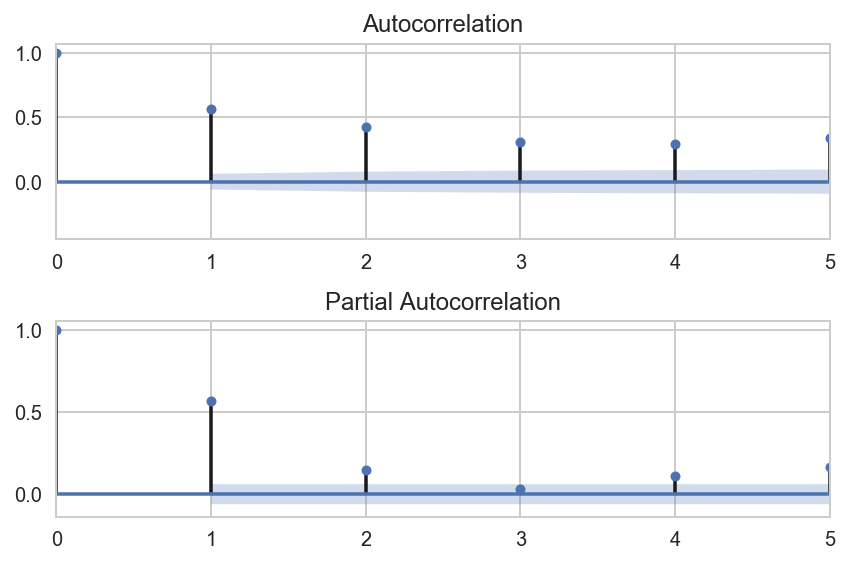

In [71]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(cont_log, ax=ax1)
plt.xlim(0,5)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(cont_log, ax=ax2)
plt.xlim(0,5)
plt.tight_layout()
plt.show()

In [20]:
m = sm.tsa.ARMA(cont_log, (2, 1))
r = m.fit()
print(r.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                  units   No. Observations:                 1034
Model:                     ARMA(2, 1)   Log Likelihood                -289.860
Method:                       css-mle   S.D. of innovations              0.320
Date:                Thu, 05 Jul 2018   AIC                            589.720
Time:                        18:26:56   BIC                            614.426
Sample:                    01-01-2012   HQIC                           599.095
                         - 10-31-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2715      0.245     33.817      0.000       7.792       8.751
ar.L1.units     1.3636      0.026     52.041      0.000       1.312       1.415
ar.L2.units    -0.3642      0.026    -13.946    

In [21]:
y_hat = r.predict()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [22]:
y_hat = pd.DataFrame(y_hat)

In [23]:
y2 = pd.DataFrame(y_hat.iloc[:,-1])

In [24]:
y2 = y2.reset_index()

In [25]:
y2.columns = ['date', 'y_hat']

In [26]:
ex =pd.merge(cont_df, y2 , how = 'inner', on = 'date')

In [27]:
ex.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,year,y_hat
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,11.67,36.0,...,True,False,False,False,False,False,Sunday,1,2012,8.271503
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,11.67,36.0,...,True,False,False,False,False,False,Sunday,1,2012,8.271503
2,2012-01-01,2,5,191.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,False,False,Sunday,1,2012,8.271503
3,2012-01-01,2,11,0.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,False,False,Sunday,1,2012,8.271503
4,2012-01-01,2,44,215.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,False,False,Sunday,1,2012,8.271503


In [28]:
ex['weekend'] = False
ex.weekend[ex['week_day_name'] == 'Sunday'] = True
ex.weekend[ex['week_day_name'] == 'Saturday'] = True
ex.weekend[ex['week_day_name'] == 'Friday'] = True

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
ex.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'y_hat', 'weekend'],
      dtype='object')

In [30]:
ex.columns =['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'y_hat', 'weekend']

In [31]:
ex = ex[ex.tmax.isnull() == False]
ex = ex[ex.tmin.isnull() == False]
ex = ex[ex.dewpoint.isnull() == False]
ex = ex[ex.wetbulb.isnull() == False]
ex = ex[ex.preciptotal.isnull() == False]

In [106]:
len(ex)

101149

In [32]:
model = sm.OLS.from_formula("I(np.log(units +1)) ~  C(store_nbr)*C(item_nbr) + scale(dewpoint) + scale(preciptotal)  + C(FG2) + C(FG) + C(FZ) + scale(y_hat) + C(weekend) + 0" , data = ex)

result = model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                             OLS Regression Results                             
Dep. Variable:     I(np.log(units + 1))   R-squared:                       0.536
Model:                              OLS   Adj. R-squared:                  0.536
Method:                   Least Squares   F-statistic:                     1107.
Date:                  Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                          18:29:21   Log-Likelihood:            -1.4853e+05
No. Observations:                 98682   AIC:                         2.973e+05
Df Residuals:                     98578   BIC:                         2.983e+05
Df Model:                           103                                         
Covariance Type:              nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [34]:
model2 = sm.OLS.from_formula("I(np.log(units +1)) ~  C(store_nbr)*C(item_nbr) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ) + C(BL) + C(weekend) + scale(y_hat) +  C(year) + 0" , data = ex)


result2 = model2.fit()
print(result2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                             OLS Regression Results                             
Dep. Variable:     I(np.log(units + 1))   R-squared:                       0.538
Model:                              OLS   Adj. R-squared:                  0.538
Method:                   Least Squares   F-statistic:                     1075.
Date:                  Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                          19:07:17   Log-Likelihood:            -1.4830e+05
No. Observations:                 98682   AIC:                         2.968e+05
Df Residuals:                     98574   BIC:                         2.978e+05
Df Model:                           107                                         
Covariance Type:              nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [41]:
ex.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,PR,BC,BL,VC,week_day_name,day_of_year,year,y_hat,weekend,is_blackfriday
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,11.67,36.0,...,False,False,False,False,Sunday,1,2012,8.271503,True,0
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,11.67,36.0,...,False,False,False,False,Sunday,1,2012,8.271503,True,0
2,2012-01-01,2,5,191.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,Sunday,1,2012,8.271503,True,0
3,2012-01-01,2,11,0.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,Sunday,1,2012,8.271503,True,0
4,2012-01-01,2,44,215.0,14,50.0,34.0,42.0,5.00,25.0,...,False,False,False,False,Sunday,1,2012,8.271503,True,0


In [57]:
model2 = sm.OLS.from_formula("I(np.log(units +1)) ~  C(store_nbr):C(item_nbr) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ)  + C(weekend) + I(np.exp(y_hat)) +  C(year) + 0", data = ex)


result2 = model2.fit()
print(result2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                             OLS Regression Results                             
Dep. Variable:     I(np.log(units + 1))   R-squared:                       0.542
Model:                              OLS   Adj. R-squared:                  0.542
Method:                   Least Squares   F-statistic:                     1101.
Date:                  Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                          20:29:58   Log-Likelihood:            -1.4786e+05
No. Observations:                 98658   AIC:                         2.959e+05
Df Residuals:                     98551   BIC:                         2.970e+05
Df Model:                           106                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

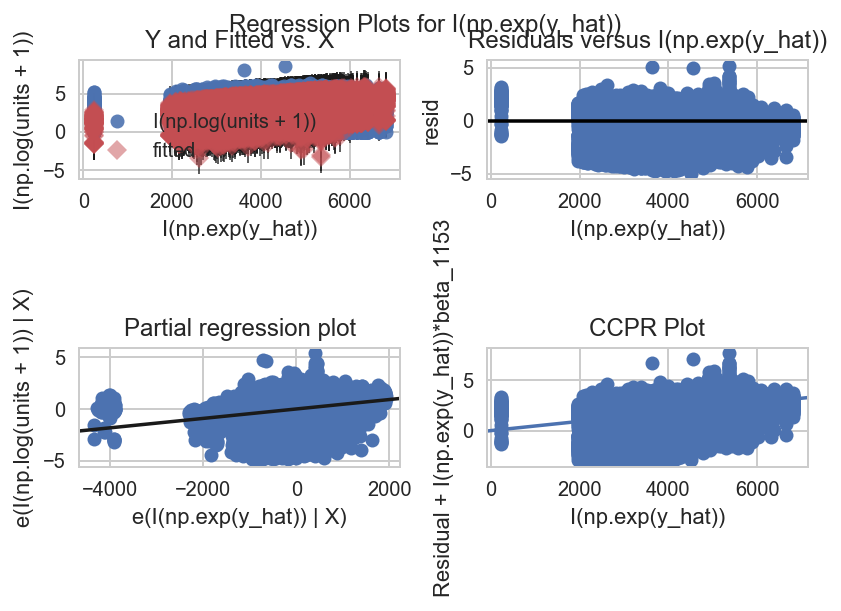

In [60]:
fig = sm.graphics.plot_regress_exog(result2, "I(np.exp(y_hat))")
plt.show()

In [36]:
blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
              "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
              "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]

In [42]:
ex["month"] = ex["date"].dt.month

In [39]:
ex["is_blackfriday"] = ex.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)

In [61]:
model4 = sm.OLS.from_formula("log_units ~  C(store_nbr):C(item_nbr) + scale(depart) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ)  + C(weekend) + scale(y_hat) + C(month) + C(year) + C(is_blackfriday) + 0" , data = ex)

result4 = model4.fit()
print(result4.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     975.8
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:38:40   Log-Likelihood:            -1.4800e+05
No. Observations:               98658   AIC:                         2.962e+05
Df Residuals:                   98538   BIC:                         2.974e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\regression\predstd.py:97: RuntimeWarning: invalid value encountered in sqrt
  predstd = np.sqrt(predvar)


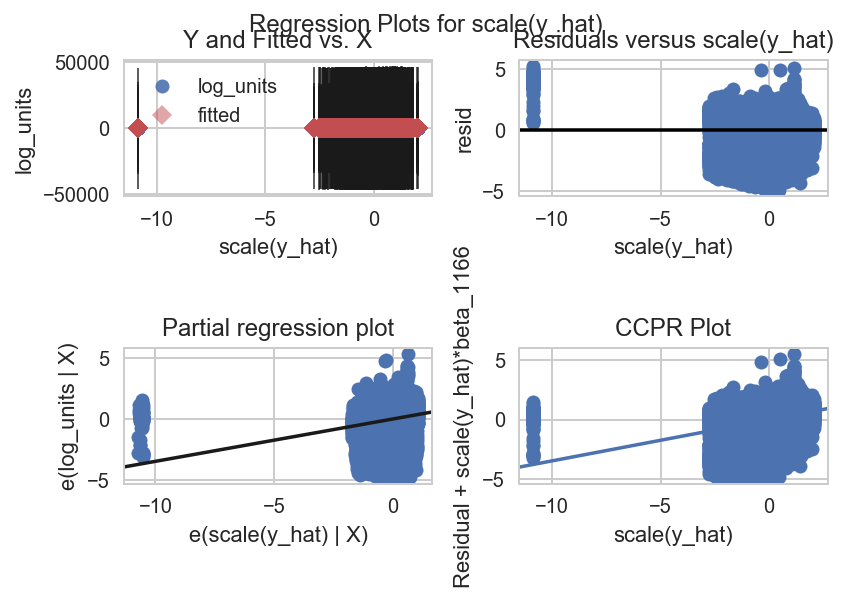

In [62]:
fig = sm.graphics.plot_regress_exog(result4, "scale(y_hat)")


plt.show()

In [63]:

plt.show()

In [52]:
model3 = sm.OLS.from_formula("log_units ~  C(store_nbr):C(item_nbr) + scale(depart) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ)  + C(weekend) + C(month) + C(year) + C(is_blackfriday) + 0" , data = ex)


result3 = model3.fit()
print(result3.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     931.9
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:09:02   Log-Likelihood:            -1.4944e+05
No. Observations:               98658   AIC:                         2.991e+05
Df Residuals:                   98539   BIC:                         3.002e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(SN

In [64]:
model6 = sm.OLS.from_formula("log_units ~  C(store_nbr) + C(item_nbr) + scale(depart) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ)  + C(weekend) + C(month) + C(year) + C(is_blackfriday) + 0" , data = ex)


result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1216.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:02:23   Log-Likelihood:            -1.4984e+05
No. Observations:               98658   AIC:                         2.999e+05
Df Residuals:                   98568   BIC:                         3.007e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(store_nbr)[1]            3

In [90]:
import statsmodels.api as sm
model_GLSAR = sm.GLSAR.from_formula("I(log_units**3) ~  C(store_nbr) + C(item_nbr) + scale(depart) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ)  + C(weekend) + C(month) + C(year) + C(is_blackfriday) + C(hardsnow) + C(hardrain)" , data = ex, rho=2)
results_GLSAR = model_GLSAR.fit()

In [91]:
print(results_GLSAR.summary())

                           GLSAR Regression Results                           
Dep. Variable:      I(log_units ** 3)   R-squared:                       0.595
Model:                          GLSAR   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1491.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:43:02   Log-Likelihood:            -4.5605e+05
No. Observations:               98656   AIC:                         9.123e+05
Df Residuals:                   98558   BIC:                         9.132e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 37

In [89]:
# 특정조건열 추가 (0, 0.2 , 0.5 , 1 , 3 5단계로 강우량 단계 설정)
ex['hardrain'] = [(((4 if i > 3 else 3) if i > 1 else 2) if i > 0.5 else 1) if i > 0.1 else 0 for i in ex['preciptotal']]

# 득정조건열 추가 ()
ex['hardsnow'] = [(((4 if i > 3 else 3) if i > 2 else 2) if i > 1 else 1) if i > 0.2 else 0 for i in ex['snowfall']]

In [50]:
ex["log_units"] = ex.units.apply(lambda x : np.log(x + 1))

In [46]:
ex = ex[ex.tmax.isnull() == False]
ex = ex[ex.depart.isnull() == False][;]



In [ ]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.show()

In [65]:
from sklearn.model_selection import KFold
from patsy import dmatrix

In [68]:


# 독립변수와 종속변수로 나누기
df2_1_target = ex['log_units']
df2_1_X = ex.drop(columns=['log_units'])

len(df2_1_X), len(df2_1_target)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상


(98658, 98658)

In [71]:
ex.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'y_hat', 'weekend', 'is_blackfriday', 'month', 'log_units'],
      dtype='object')

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [75]:
ex.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'y_hat', 'weekend', 'is_blackfriday', 'month', 'log_units'],
      dtype='object')

In [74]:

formula = 'log_units ~  C(store_nbr) + C(item_nbr) + scale(depart) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ) + C(weekend) + C(month) + C(year) + C(is_blackfriday) + 0'
dfX = dmatrix(formula, ex, return_type='dataframe')
dfy = pd.DataFrame(ex, columns=["log_units"])




PatsyError: encountered outcome variables for a model that does not expect them

In [ ]:

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
   X_train = dfX.values[train_index]
   y_train = dfy.values[train_index]
   X_test = dfX.values[test_index]
   y_test = dfy.values[test_index]
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   scores[i] = r2_score(y_test, y_pred)

scores